# **1. Perkenalan Dataset**


- Dataset diperoleh dari: https://www.kaggle.com/datasets/mathchi/diabetes-data-set 
- Dataset didownload dalam format .csv file 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.model_selection import GridSearchCV, train_test_split

import sklearn.neural_network as ann
import sklearn.metrics as met 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df_diabetes = pd.read_csv("../Diabetes.csv", sep=",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Rincian atribut dataset:**
- Pregnancies = Jumlah kehamilan yang pernah dialami pasien.
- Glucose = Konsentrasi glukosa plasma setelah 2 jam dalam tes toleransi glukosa oral.
- BloodPressure = Tekanan darah diastolik dalam satuan mmHg.
- SkinThickness =Ketebalan lipatan kulit triseps dalam mm.
- Insulin = Kadar insulin serum setelah 2 jam (mu U/ml).
- BMI (Body Mass Index) = Indeks massa tubuh yang dihitung sebagai berat (kg) / tinggi (m²).
- DiabetesPedigreeFunction = Skor yang menunjukkan kemungkinan seseorang terkena diabetes berdasarkan riwayat keluarga.
- Age = Usia pasien dalam tahun.
- Outcome, Target kelas (0 = tidak diabetes, 1 = diabetes) = Model akan mencoba memprediksi apakah seseorang menderita diabetes atau tidak berdasarkan fitur lainnya.



# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df_diabetes.info()

print("jumlah data kosong: ", df_diabetes.isnull().sum())
print("Jumlah duplikasi: ", df_diabetes.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
jumlah data kosong:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age      

**Insight:**
- Proses df_diabetes.info() pada data tersebut menampilkan jenis kolom, tipe data dan isi dari kolom tersebut.
- Tidak ada masalah dengan jumlah data yang dimunculkan (semua data terisi dan tidak ada kosong).
- Tidak ada duplipkasi data dari dataframe tersebut.

In [4]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insight:**
- Kode df_diabetes.describe() bertujuan untuk menunjukkan parameter statistik.
- data parameter statistik yang dihsilkan terlihat ada beberapa keanehan outlier pada data.

Boxplot untuk Pregnancies:


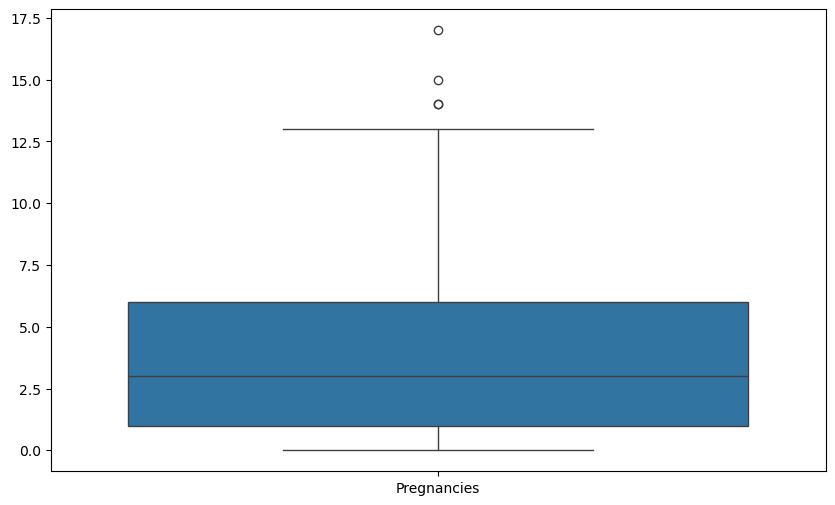

Boxplot untuk Glucose:


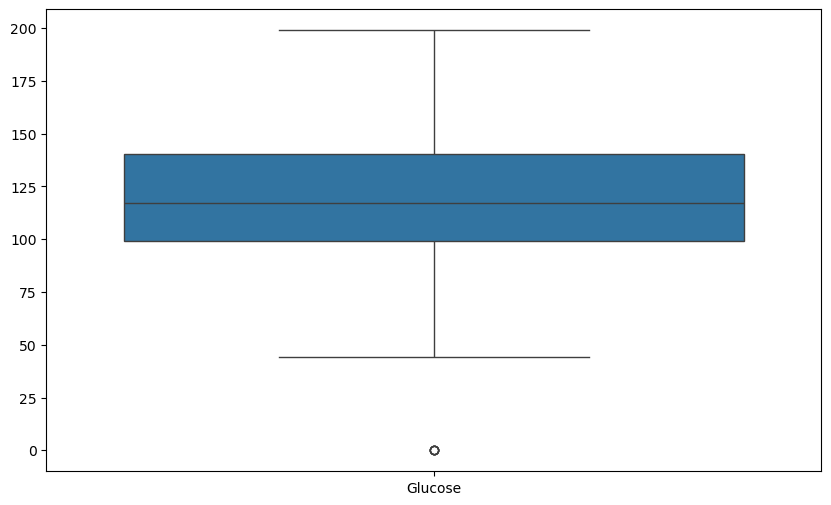

Boxplot untuk BloodPressure:


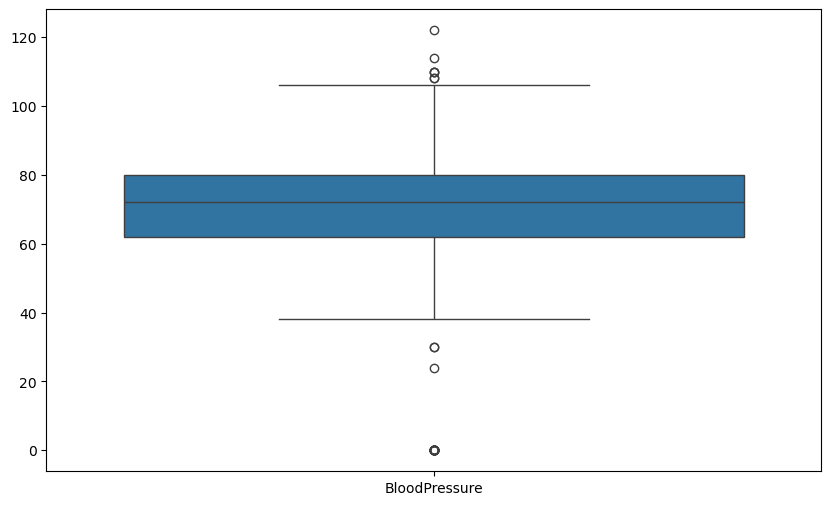

Boxplot untuk SkinThickness:


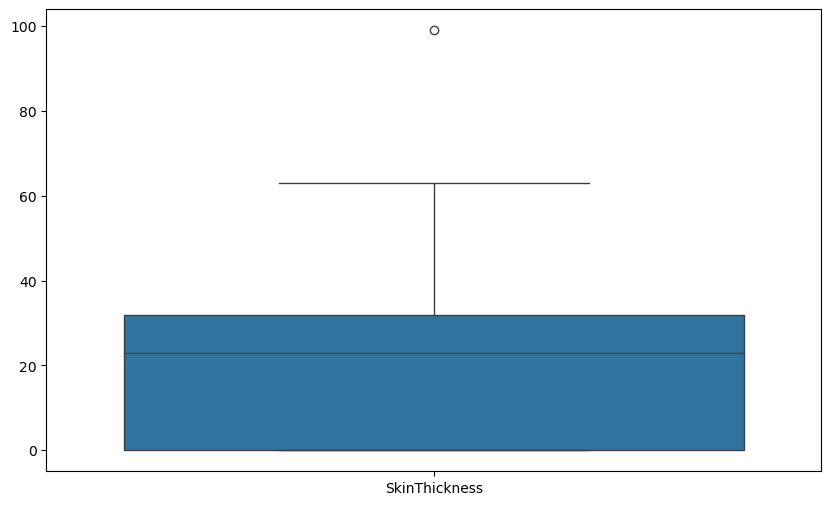

Boxplot untuk Insulin:


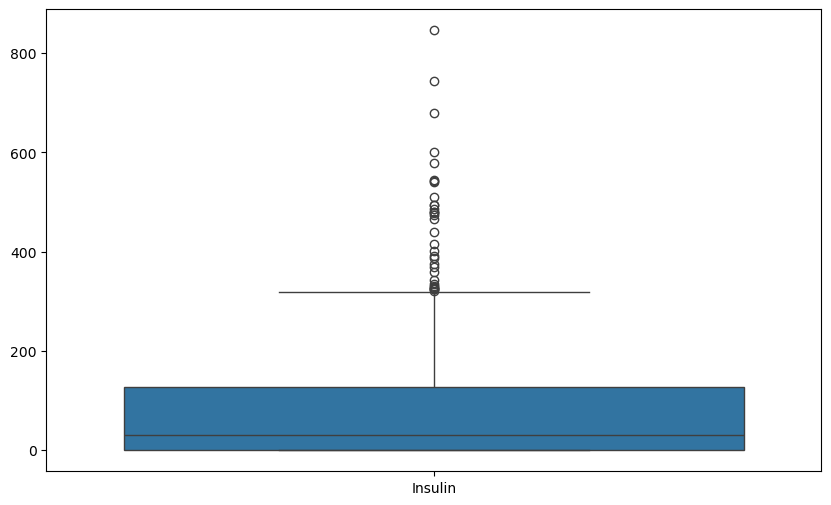

Boxplot untuk BMI:


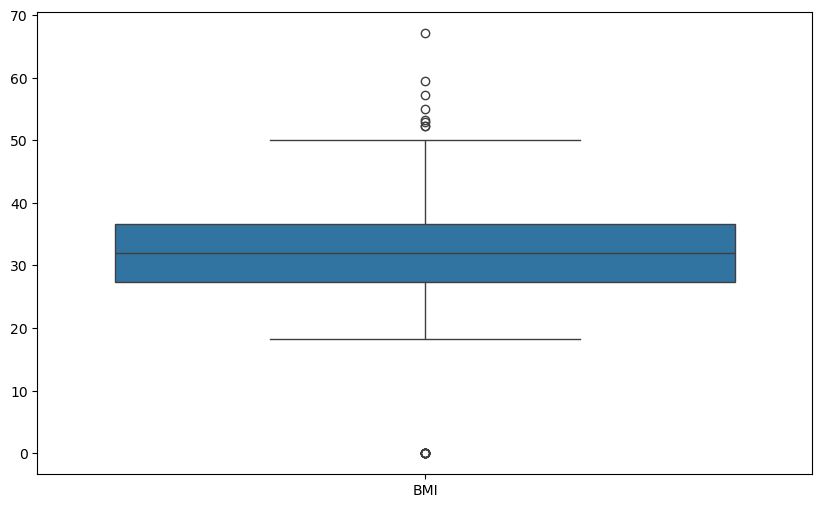

Boxplot untuk DiabetesPedigreeFunction:


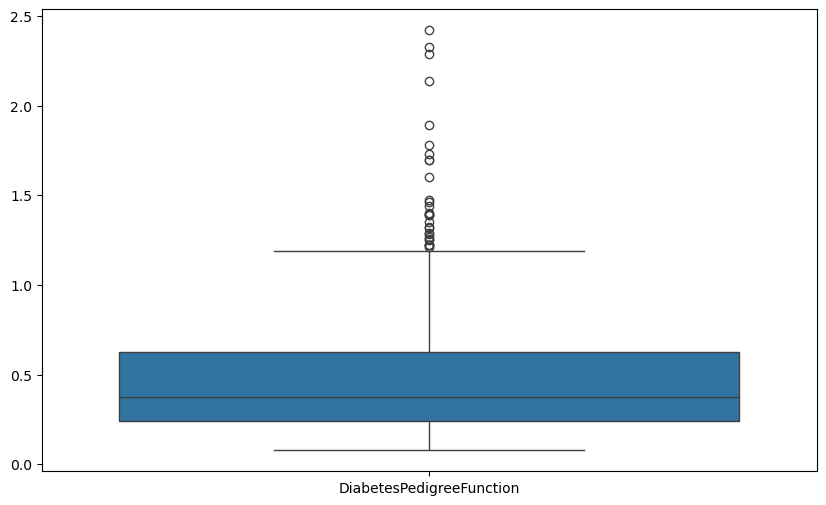

Boxplot untuk Age:


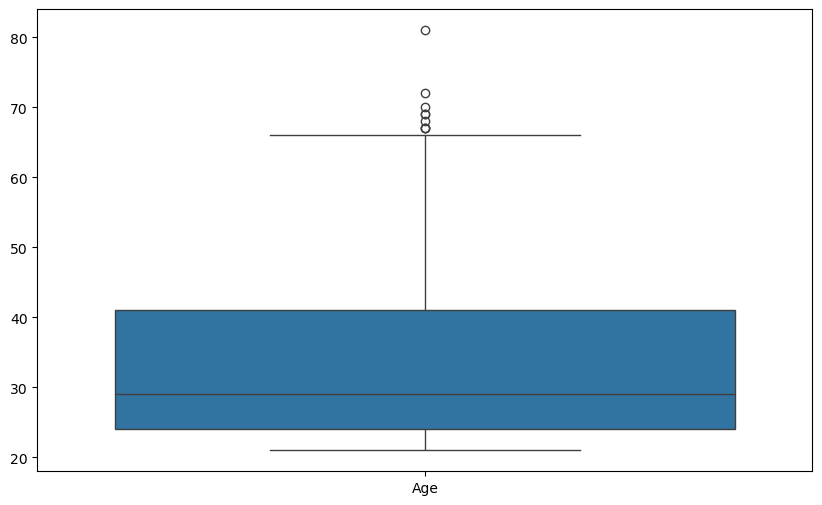

Boxplot untuk Outcome:


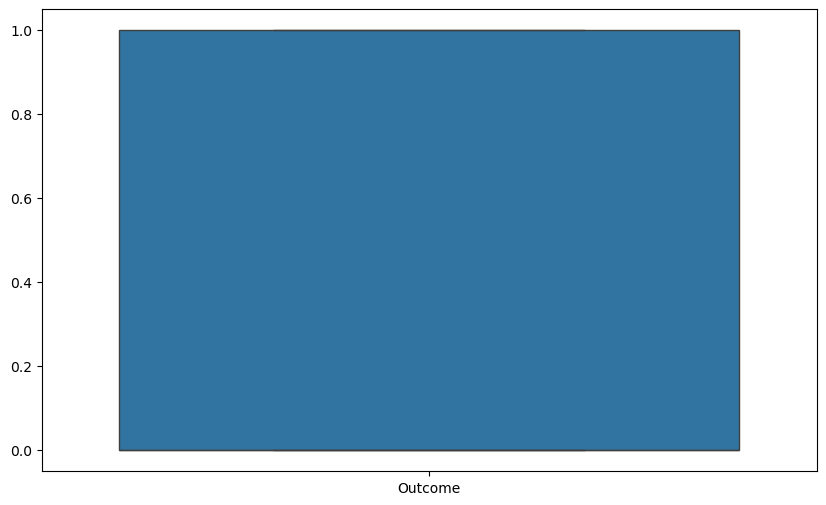

In [5]:
def boxplot(name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_diabetes[[name]])
    plt.show()

for col in df_diabetes.columns:
    print(f"Boxplot untuk {col}:")
    boxplot(col)

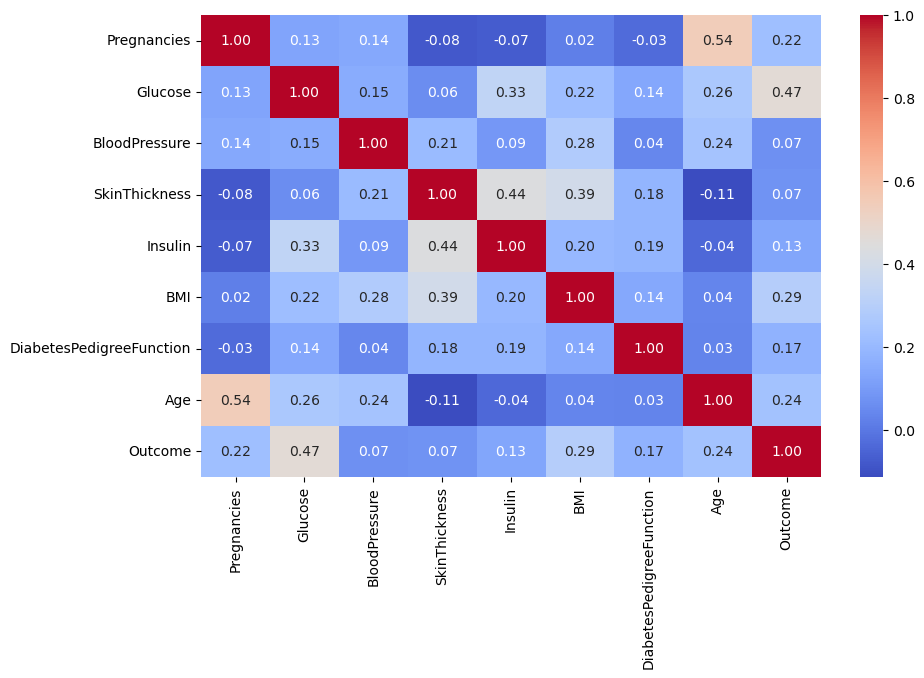

In [6]:
numeric_df = df_diabetes.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Insight:**
- Proses visualisasi boxplot yang membntu visualisasi dalam pemeriksaan outlier sebelumnya.
- Proses matriks kolerasi bertujuan menunjukkan kolerasi antar atribut dan melihat atribut yang memiliki kolerasi tersebesar terhadap indikasi seseorang mengalami diabetes atau tidak.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
def outlier(nama):
    q25, q75 = np.percentile(df_diabetes[nama], 25), np.percentile(df_diabetes[nama], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
     
    outlier = [x for x in df_diabetes[nama] if x < minimum or x > maximum]
    return outlier

for atribut in df_diabetes.columns:
    print(f"Adapun outlier pada atribut {atribut} : {outlier(atribut)}")

Adapun outlier pada atribut Pregnancies : [15, 17, 14, 14]
Adapun outlier pada atribut Glucose : [0, 0, 0, 0, 0]
Adapun outlier pada atribut BloodPressure : [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
Adapun outlier pada atribut SkinThickness : [99]
Adapun outlier pada atribut Insulin : [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]
Adapun outlier pada atribut BMI : [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Adapun outlier pada atribut DiabetesPedigreeFunction : [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Adapun outlier pada atribut Age : [69, 67

**Insight:**
- Kode diatas merupakan proses pemeriksaan outlier menggunakan teknik IQR berdasarkan 25% dan 75%.
- Terlihat ada masalah outlier pada data, ini akan berakibat moel machine learning tidak berjalan dengan baik.

In [8]:
# Data outlier yang harus diperbaiki -> lakukan teknik mengatasi outlier dengan teknik menghapus oulier.
def kolomoutlier(df):
    outlier_columns = []
    for col in df.select_dtypes(include=[np.number]).columns:
        q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = df[(df[col] < minimum) | (df[col] > maximum)]
        if not outliers.empty:  # Jika ada outlier, tambahkan ke list
            outlier_columns.append(col)
    
    return outlier_columns

# perintah hapus outlier
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        q25, q75 = np.percentile(df_clean[col], 25), np.percentile(df_clean[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        df_clean = df_clean[(df_clean[col] >= minimum) & (df_clean[col] <= maximum)]
    
    return df_clean

columns_with_outliers = kolomoutlier(df_diabetes)
print(f"Kolom dengan outlier: {columns_with_outliers}")

df_diary_clean = remove_outliers(df_diabetes, columns_with_outliers)
print(f"Jumlah data sebelum menghapus outlier: {len(df_diabetes)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_diary_clean)}")

df_diabetes = df_diary_clean
display(df_diabetes)

Kolom dengan outlier: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Jumlah data sebelum menghapus outlier: 768
Jumlah data setelah menghapus outlier: 636


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Insight:**
- Proses tersebut dilakukan untuk menghpus data outlier pada data, agar pembelajaran model machine learning dapat berjalan dengan baik. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_diabetes_scaled = scaler.fit_transform(df_diabetes)

df_diabetes = pd.DataFrame(df_diabetes_scaled, columns=df_diabetes.columns)

df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.490446,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.267516,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.162420,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.284848,0.315287,0.082103,0.000000,0.0
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.235669,0.113469,0.204545,0.0


**Insight:**
- Proses normalisasi dilakukan dengan teknik normalisasi minmax. Tujuan dilkaukan normalisasi mendorong stabilitas dalam proses pengoptimalan, mendorong konvergensi yang lebih cepat.

In [10]:
X = df_diabetes.drop(['Outcome'], axis=1)
y = df_diabetes['Outcome']